In [1]:
import numpy as np
import matplotlib.pyplot as plt

x		y (RK4)
0.00		0.50000000
0.20		0.82929333
0.40		1.21407621
0.60		1.64892202
0.80		2.12720268
1.00		2.64082269
1.20		3.17989417
1.40		3.73234007
1.60		4.28340950
1.80		4.81508569
2.00		5.30536300


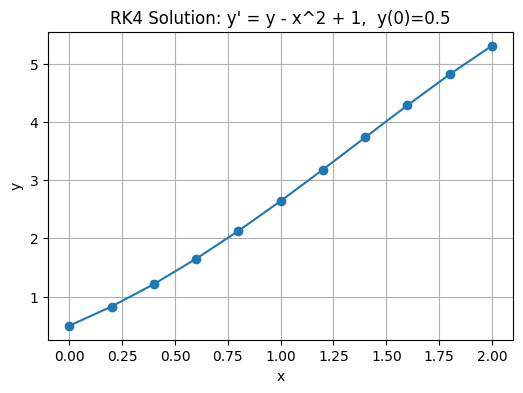

In [2]:
def rk4(f, x0, y0, x_end, h):
    """
    4th-order Runge–Kutta solver for y' = f(x, y)
    Returns arrays (x, y).
    """
    n = int(np.ceil((x_end - x0) / h))
    x = np.zeros(n + 1, dtype=float)
    y = np.zeros(n + 1, dtype=float)

    x[0], y[0] = x0, y0

    for i in range(n):
        xi, yi = x[i], y[i]

        k1 = f(xi, yi)
        k2 = f(xi + h/2, yi + (h/2)*k1)
        k3 = f(xi + h/2, yi + (h/2)*k2)
        k4 = f(xi + h,   yi + h*k3)

        y[i + 1] = yi + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        x[i + 1] = xi + h

    return x, y

# Example ODE: y' = y - x^2 + 1
def f(x, y):
    return y - x**2 + 1

# Initial condition and step
x0, y0 = 0.0, 0.5
x_end = 2.0
h = 0.2

x, y = rk4(f, x0, y0, x_end, h)

# Print results
print("x\t\ty (RK4)")
for xi, yi in zip(x, y):
    print(f"{xi:.2f}\t\t{yi:.8f}")

# Plot
plt.figure(figsize=(6,4))
plt.plot(x, y, marker="o")
plt.xlabel("x")
plt.ylabel("y")
plt.title("RK4 Solution: y' = y - x^2 + 1,  y(0)=0.5")
plt.grid(True)
plt.show()